# DVC

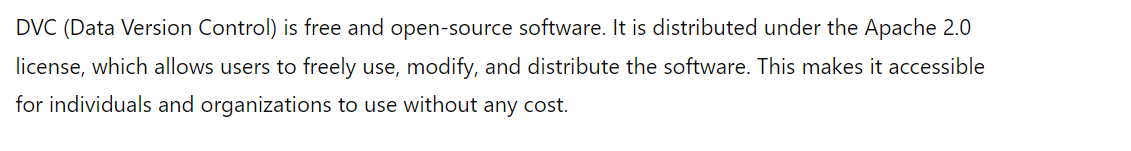

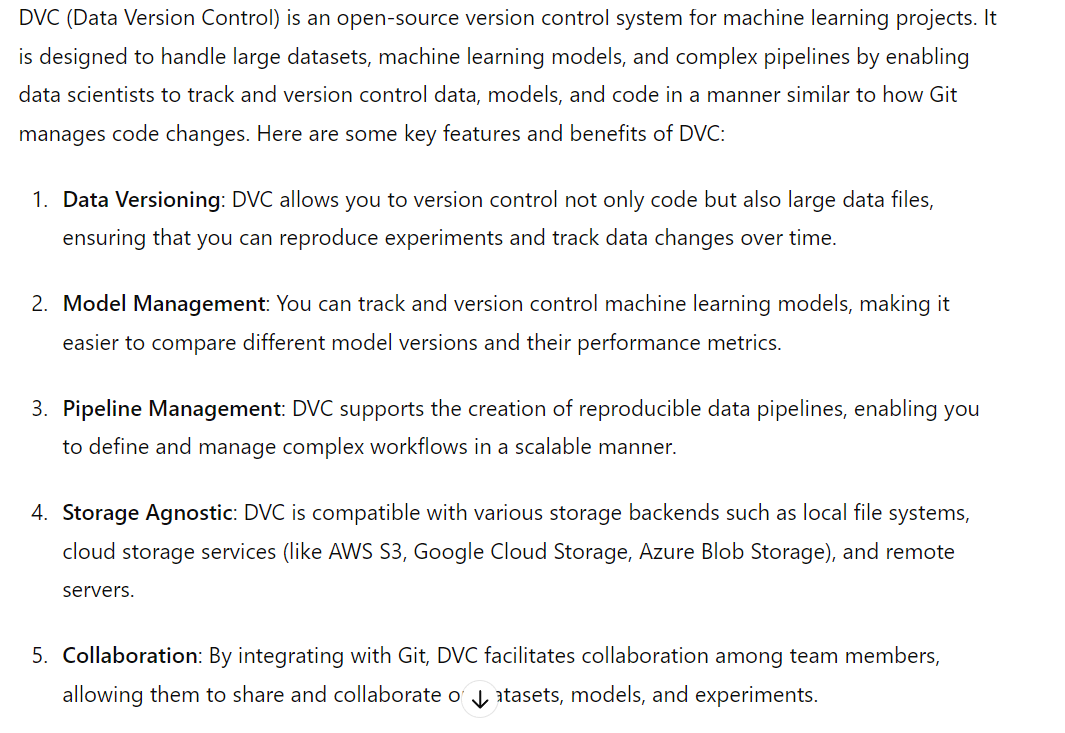
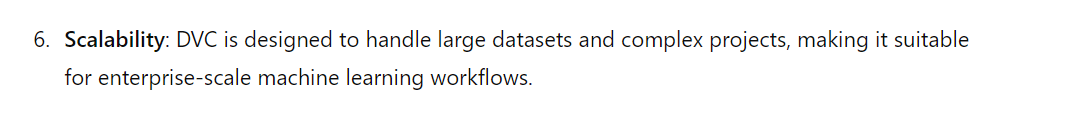

# Step 1: Install DVC
First, you need to install DVC. You can do this using pip:

> pip install dvc


# Step 2: Initialize DVC in Your Project
Navigate to your project directory and initialize DVC:

> cd your-ml-project
> dvc init

# Step 3: Configure Remote Storage
Configure remote storage to store your datasets and models. This could be an AWS S3 bucket, Google Cloud Storage, Azure Blob Storage, or another storage solution.


> dvc remote add -d myremote s3://mybucket/path

> dvc remote modify myremote endpointurl https://s3.amazonaws.com

# Step 4: Add Data and Models to DVC
Add your datasets and models to DVC so they can be tracked. For example:


> dvc add data/raw_data.csv

> dvc add models/model.pkl
This will create .dvc files that track the version of these files.

# Step 5: Track DVC Files with Git
Commit the .dvc files to your Git repository:


> git add data/raw_data.csv.dvc models/model.pkl.dvc .gitignore

> git commit -m "Add raw data and model to DVC"

# Step 6: Push Data and Models to Remote Storage
Push your datasets and models to the configured remote storage:

> dvc push

# Example

In [ ]:

import mlflow
import dvc.api
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib
import os

# Start an MLflow run
with mlflow.start_run():

    # Get data file from DVC
    data_url = dvc.api.get_url('data/raw_data.csv', remote='myremote')
    
    # Load your data
    data = pd.read_csv(data_url)

    # Perform your model training
    model = RandomForestClassifier()
    model.fit(data.drop('target', axis=1), data['target'])

    # Save your model
    os.makedirs('models', exist_ok=True)
    model_path = 'models/model.pkl'
    joblib.dump(model, model_path)

    # Log the model with MLflow
    mlflow.log_artifact(model_path)

    # Add model to DVC and push to remote storage
    os.system(f'dvc add {model_path}')
    os.system('dvc push')

    # Optionally, commit the changes to Git
    os.system('git add .')
    os.system('git commit -m "Train model and track with DVC and MLflow"')
    os.system('git push')
